# Problem Statement
Predicting turbine energy yield (TEY) using ambient variables as features.

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# Exploratory Data Analysis

In [4]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

### Descriptive Analysis

In [3]:
df.shape

(15039, 11)

In [4]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [10]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

### Data Visualization

### Univariate plots

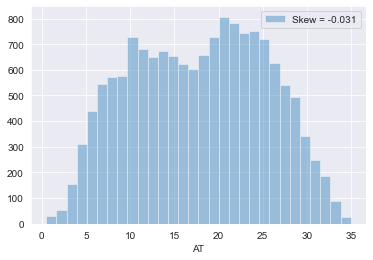

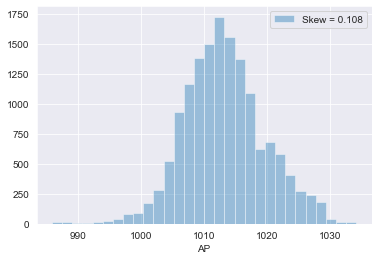

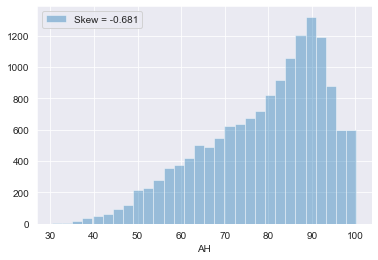

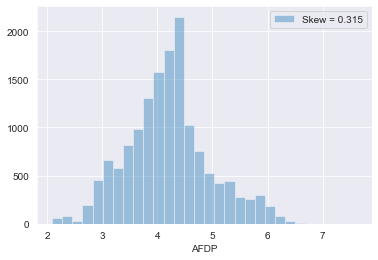

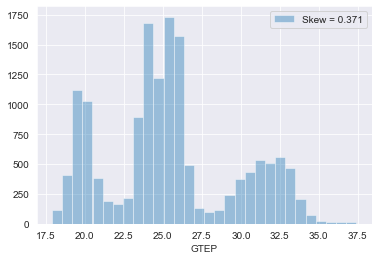

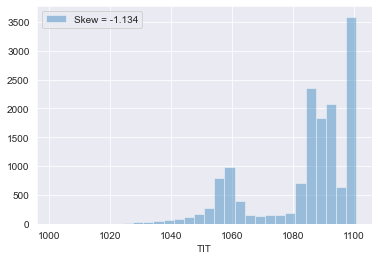

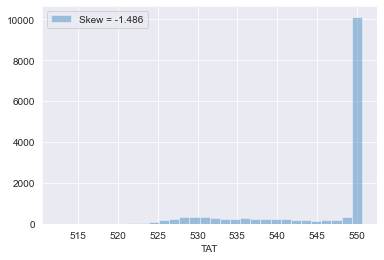

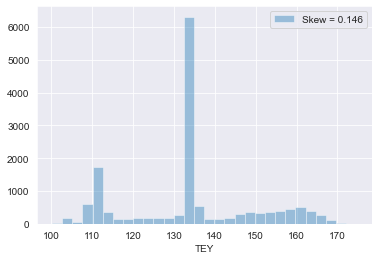

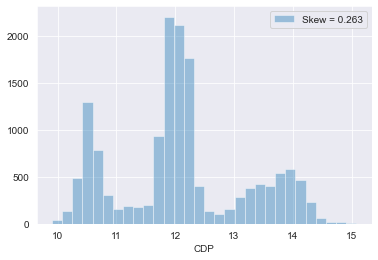

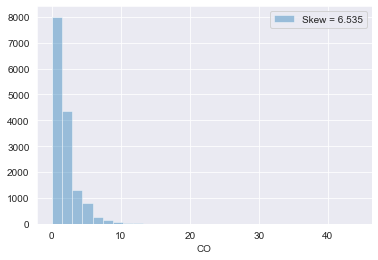

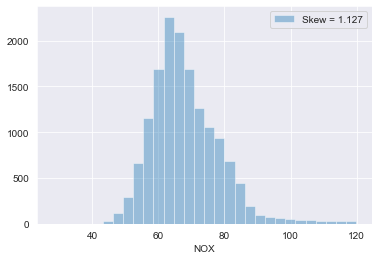

In [14]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Text(0.5, 1.0, 'Histogram of the Target Column')

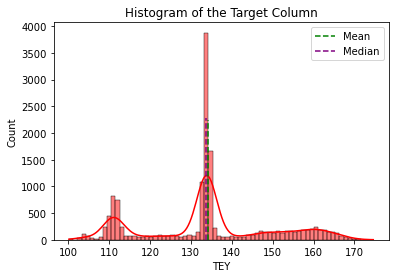

In [11]:
plt.figure()
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

###### Unsurprisingly, Mostly none of the features are on the same scale as we already saw in the previous section.

### Multivariate Analysis

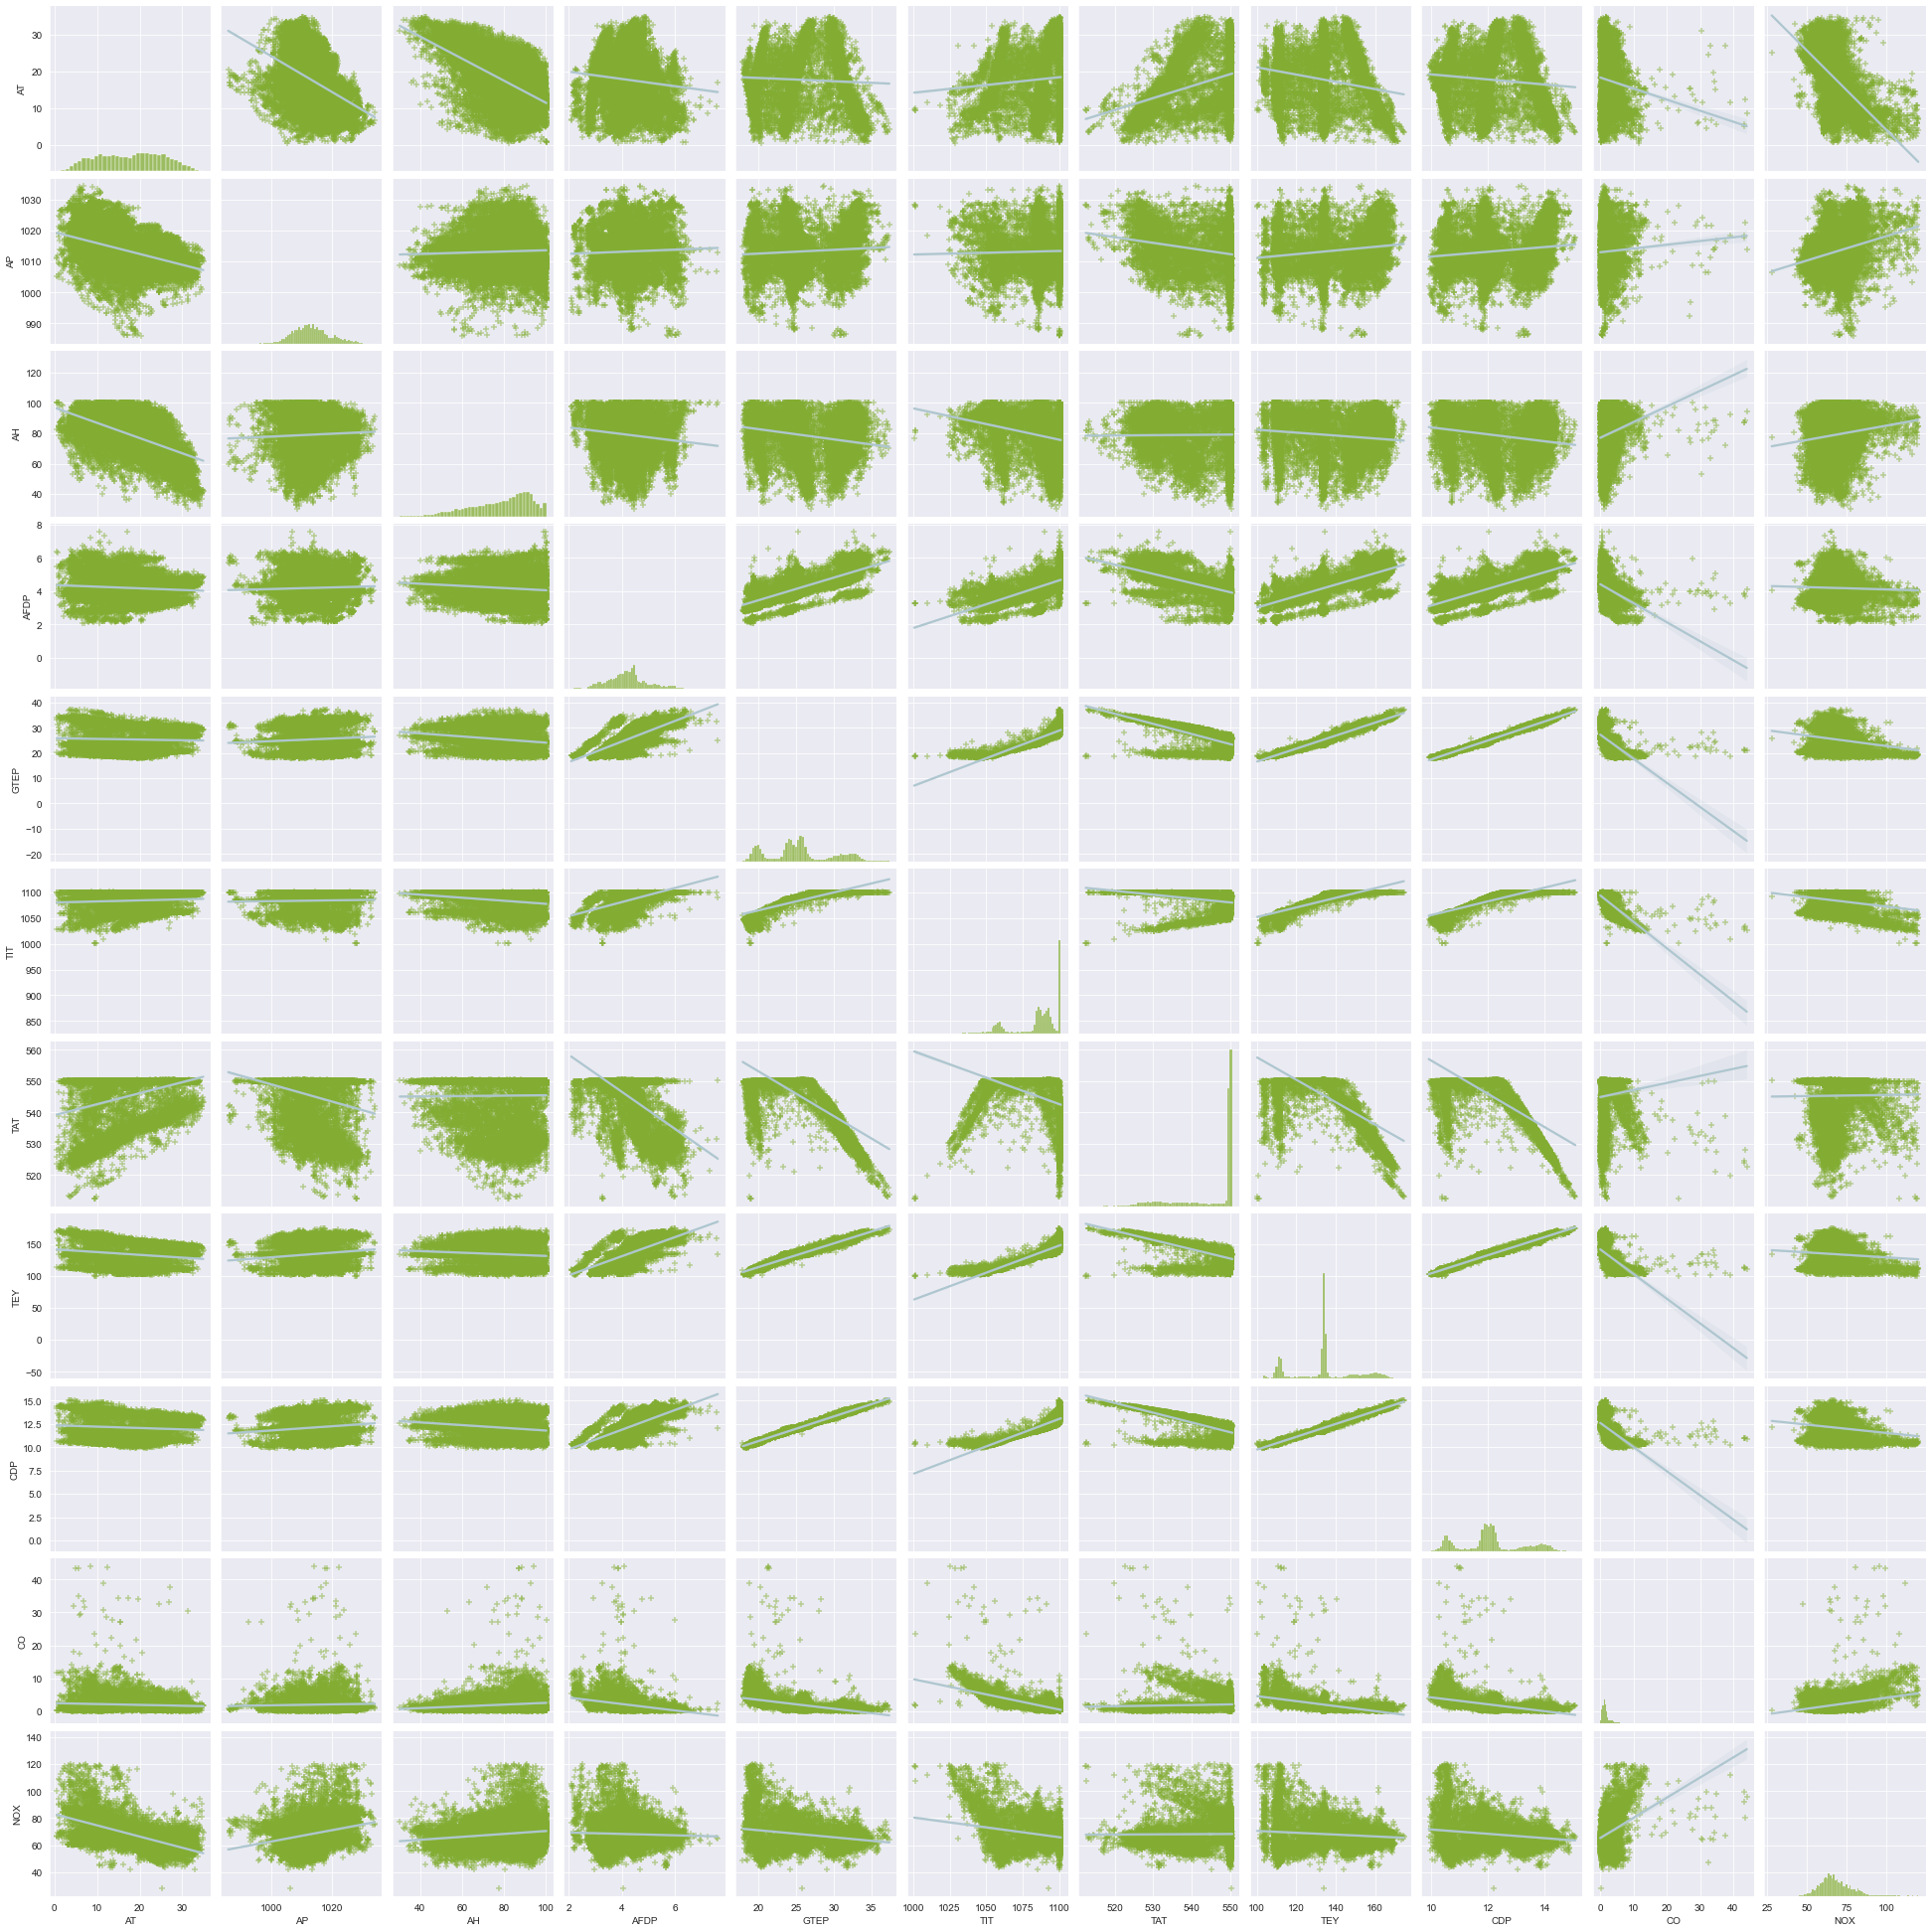

In [22]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})

In [25]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

# Feature Selection Technique

In [12]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [28]:
test = SelectKBest(score_func = mutual_info_regression, k ='all')
fit = test.fit(x, y)

In [29]:
scores = fit.scores_
features = fit.transform(x)

In [30]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns = ['Score', 'Feature'])
score_df.sort_values(by ="Score", ascending = False, inplace = True)
score_df

,Score,Feature
7,1.712874,CDP
4,1.599780,GTEP
5,1.325209,TIT
6,0.896813,TAT
3,0.660682,AFDP
8,0.512642,CO
0,0.412884,AT
9,0.300530,NOX
1,0.135992,AP
2,0.097619,AH


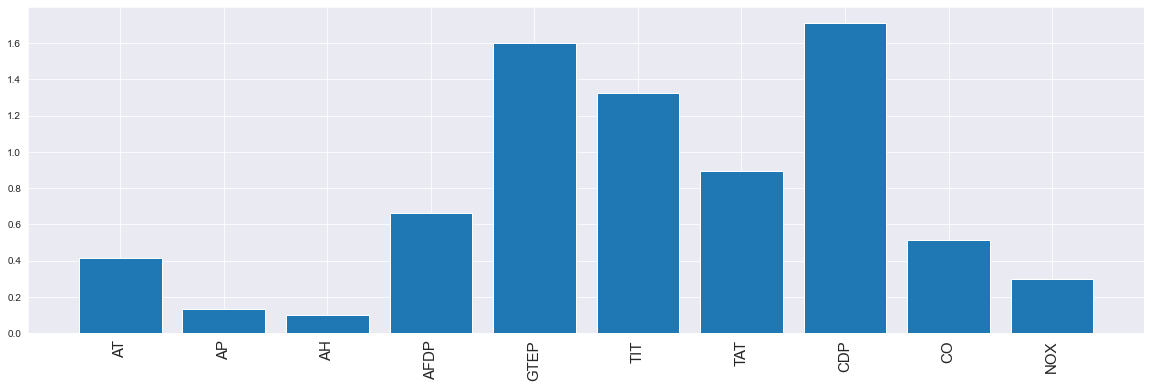

In [31]:
fig, axes = plt.subplots(figsize = (20, 6))
plt.bar([i for i in range(len(scores))], scores)
axes.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

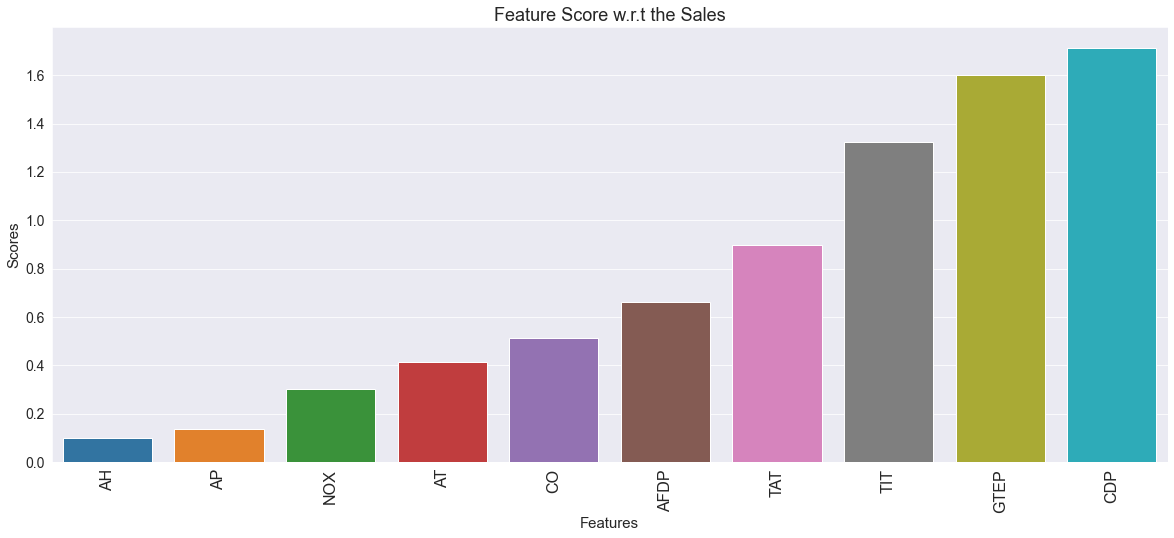

In [32]:
plt.figure(figsize=(20,8))
sns.barplot(x ='Feature', y ="Score", data = score_df, order = score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [33]:
score_df.sort_values('Score', ascending = False)

,Score,Feature
7,1.712874,CDP
4,1.599780,GTEP
5,1.325209,TIT
6,0.896813,TAT
3,0.660682,AFDP
8,0.512642,CO
0,0.412884,AT
9,0.300530,NOX
1,0.135992,AP
2,0.097619,AH


In [34]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


### 5.1. Data Pre-Processing
##### Feature Engineering

In [35]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype !='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [36]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


### Test Train Split With Imbalanced Dataset

In [39]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Hyperparameter Tuning

### Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [41]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation = 'relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss ='mean_absolute_error', metrics =['mean_absolute_error'])
    return model

In [42]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(build_model, objective ='val_mean_absolute_error', max_trials = 5, executions_per_trial = 3,
                     directory ='project', project_name ='Gas Turbine')

In [43]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [44]:
tuner.search(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Oracle triggered exit


Trial 5 Complete [00h 06m 21s]
val_mean_absolute_error: 0.02383941536148389

Best val_mean_absolute_error So Far: 0.023741014922658604
Total elapsed time: 00h 43m 32s


In [45]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 0.023741014922658604
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 64
units_3: 64
units_4: 64
units_5: 64
units_6: 32
units_7: 64
units_8: 64
units_9: 32
units_10: 64
units_11: 96
units_12: 64
units_13: 96
Score: 0.023776863391200703
Trial summary
Hyperparameters:
num_layers: 9
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 64
units_3: 64
units_4: 64
units_5: 64
units_6: 32
units_7: 64
units_8: 32
units_9: 64
units_10: 64
units_11: 96
units_12: 64
units_13: 32
Score: 0.023812754079699516
Trial summary
Hyperparameters:
num_layers: 3
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 64
units_3: 96
units_4: 32
units_5: 64
units_6: 64
units_7: 32
units_8: 96
units_9: 64
units_10: 96
units_11:

### Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [46]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold
from keras.layers import Dense
from keras.optimizers import Adam

def create_model():
    model1 = Sequential()
    model1.add(Dense(32, input_dim = 7, activation ='relu'))
    model1.add(Dense(64, activation ='relu'))
    model1.add(Dense(96, activation ="relu"))
    model1.add(Dense(32, activation ="relu"))
    model1.add(Dense(64, activation ="relu"))
    model1.add(Dense(32, activation ="relu"))
    model1.add(Dense(96, activation ="relu"))
    model1.add(Dense(96, activation ="relu"))
    model1.add(Dense(32, activation ="relu"))
    model1.add(Dense(64, activation ="relu"))
    model1.add(Dense(64, activation ="relu"))
    model1.add(Dense(units = 1, activation ="linear"))
    adam = Adam(learning_rate=0.001)
    model1.compile(loss ='mean_absolute_error', optimizer = adam, metrics = ["mean_absolute_error"])
    return model1

In [47]:
model1 = KerasRegressor(build_fn = create_model, verbose = 0)
batch_size = [10, 20, 40, 50]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model1, param_grid = param_grid, cv = KFold(), verbose = 10)

In [48]:
grid_result = grid.fit(x_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.039 total time=  12.9s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.042 total time=  11.7s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.048 total time=  11.4s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.047 total time=  11.6s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.033 total time=  11.6s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=40, epochs=100;, score=-0.034 total time=  32.1s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=40, epochs=100;, score=-0.040 total time=  31.8s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=40, epochs=100;, score=-0.035 total time=  31.0s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=40, epochs=100;, score=-0.031 total time=  30.8s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=40, epochs=100;, score=-0.026 total time=  36.0s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=40, epochs=200;, score=-0.038 total time= 1.1min
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [49]:
print('Best {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("{},{} with {}".format(mean, stdev, param))

Best -0.029908780381083487, using {'batch_size': 20, 'epochs': 200}
-0.04180784896016121,0.00548448123592396 with {'batch_size': 10, 'epochs': 10}
-0.034454069659113885,0.006853503296290733 with {'batch_size': 10, 'epochs': 50}
-0.03879652470350266,0.006854694173647133 with {'batch_size': 10, 'epochs': 100}
-0.030060943216085434,0.0026222013866128192 with {'batch_size': 10, 'epochs': 200}
-0.0407467819750309,0.002096877024693208 with {'batch_size': 20, 'epochs': 10}
-0.03449654579162598,0.00639404957892618 with {'batch_size': 20, 'epochs': 50}
-0.030590152740478514,0.0027589775352400703 with {'batch_size': 20, 'epochs': 100}
-0.029908780381083487,0.00110838145332074 with {'batch_size': 20, 'epochs': 200}
-0.03926999196410179,0.0031177943561293197 with {'batch_size': 40, 'epochs': 10}
-0.03272454142570495,0.0036436054582725066 with {'batch_size': 40, 'epochs': 50}
-0.03327137716114521,0.004675777637957364 with {'batch_size': 40, 'epochs': 100}
-0.03384432904422283,0.0048948358029098395 

### Hyperparameter Tuning: Optimal Droupout rate

In [50]:
from keras.layers import Dropout

def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32, input_dim = 7, activation ='relu'))
    model2.add(Dense(64, activation ='relu'))
    model2.add(Dense(96, activation ="relu"))
    model2.add(Dense(32, activation ="relu"))
    model2.add(Dense(64, activation ="relu"))
    model2.add(Dense(32, activation ="relu"))
    model2.add(Dense(96, activation ="relu"))
    model2.add(Dense(96, activation ="relu"))
    model2.add(Dense(32, activation ="relu"))
    model2.add(Dense(64, activation ="relu"))
    model2.add(Dense(64, activation ="relu"))
    model2.add(Dense(units = 1, activation ="linear"))
    adam = Adam(learning_rate = 0.001)
    model2.compile(loss ='mean_absolute_error', optimizer = adam, metrics = ["mean_absolute_error"])
    return model2

In [51]:
model2 = KerasRegressor(build_fn = create_model, batch_size = 40, epochs = 200, verbose = 0)
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(dropout_rate = dropout_rate)
grid2 = GridSearchCV(estimator = model2, param_grid = param_grid, cv = KFold(), verbose = 10)

In [52]:
grid_result2 = grid2.fit(x_test, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.029 total time= 1.1min
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.027 total time= 1.0min
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.034 total time=  58.4s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.036 total time=  58.5s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.032 total time=  57.1s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [53]:
print('Best {}, using {}'.format(grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("{},{} with {}".format(mean, stdev, param))

Best -0.029767343774437904, using {'dropout_rate': 0.2}
-0.03157414793968201,0.0031263895930114553 with {'dropout_rate': 0.0}
-0.03186550959944725,0.007817317839772577 with {'dropout_rate': 0.1}
-0.029767343774437904,0.0017606442331362772 with {'dropout_rate': 0.2}
-0.030452305823564528,0.004722096571622615 with {'dropout_rate': 0.3}
-0.030881734937429427,0.0032136234157457227 with {'dropout_rate': 0.4}
-0.03486712723970413,0.008276019553106282 with {'dropout_rate': 0.5}


### Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [54]:
def create_model(activation_function, init):
    model3 = Sequential()
    model3.add(Dense(32, input_dim = 7, activation ='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64, activation ='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64, activation ="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units = 1, activation ="linear"))
    
    adam=Adam(learning_rate = 0.001)
    model3.compile(loss ='mean_absolute_error', optimizer = adam, metrics = ["mean_absolute_error"])
    return model3

In [55]:
model3 = KerasRegressor(build_fn = create_model, batch_size = 40, epochs = 200, verbose = 0)
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
param_grid = dict(activation_function = activation_function, init = init)
grid3 = GridSearchCV(estimator = model3, param_grid = param_grid, cv = KFold(), verbose = 10)

In [56]:
grid_result3 = grid3.fit(x_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-0.865 total time= 1.7min
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-0.676 total time= 1.7min
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-0.858 total time= 1.6min
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-0.801 total time= 1.7min
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-0.791 total time= 1.8min
[CV 1/5; 2/9] START activation_function=softmax, init=uniform.........

In [57]:
print('Best {}, using {}'.format(grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("{},{} with {}".format(mean, stdev, param))

Best -0.6326555669307709, using {'activation_function': 'relu', 'init': 'normal'}
-0.7982239603996277,0.06783710210469412 with {'activation_function': 'softmax', 'init': 'normal'}
-0.7465926885604859,0.05675749663569461 with {'activation_function': 'softmax', 'init': 'uniform'}
-0.7307665705680847,0.21373143246830384 with {'activation_function': 'softmax', 'init': 'zero'}
-0.7421723127365112,0.09154630195119398 with {'activation_function': 'tanh', 'init': 'normal'}
-0.8350911855697631,0.10412685628025611 with {'activation_function': 'tanh', 'init': 'uniform'}
-0.7647716760635376,0.10798209371865745 with {'activation_function': 'tanh', 'init': 'zero'}
-0.6326555669307709,0.2042800296845135 with {'activation_function': 'relu', 'init': 'normal'}
-0.6660938680171966,0.1967756900826922 with {'activation_function': 'relu', 'init': 'uniform'}
-0.6910100132226944,0.24282253075123103 with {'activation_function': 'relu', 'init': 'zero'}


# Model Building Neural Networks

In [58]:
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [59]:
x = model_data.drop('TEY', axis = 1)
y = model_data[["TEY"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) 
x_test_scaled  = scaler_test.fit_transform(x_test) 

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [60]:
model = Sequential()
model.add(Dense(units = 50 , activation = 'relu', kernel_initializer = 'normal', input_dim = 7))
model.add(Dense(units = 20 , activation = 'tanh', kernel_initializer = 'normal')) 
model.add(Dense(units = 1  , kernel_initializer = 'normal')) 

model.compile(optimizer = "adam", loss ="mse", metrics = ["mae", "mse"])
history = model.fit(x_train_scaled, y_train , batch_size = 50, validation_split = 0.3, epochs = 100,  verbose = 1)

Epoch 1/100
169/169 [==============================] - 1s 3ms/step - loss: 17636.6094 - mae: 131.8402 - mse: 17636.6094 - val_loss: 16800.3691 - val_mae: 128.6560 - val_mse: 16800.3711
Epoch 2/100
169/169 [==============================] - 0s 1ms/step - loss: 16306.7627 - mae: 126.7028 - mse: 16306.7627 - val_loss: 15751.5811 - val_mae: 124.5133 - val_mse: 15751.5811
Epoch 3/100
169/169 [==============================] - 0s 1ms/step - loss: 15333.7061 - mae: 122.8040 - mse: 15333.7061 - val_loss: 14834.7578 - val_mae: 120.7757 - val_mse: 14834.7578
Epoch 4/100
169/169 [==============================] - 0s 1ms/step - loss: 14450.1191 - mae: 119.1520 - mse: 14450.1191 - val_loss: 13982.3125 - val_mae: 117.1935 - val_mse: 13982.3125
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 13621.8008 - mae: 115.6242 - mse: 13621.8008 - val_loss: 13178.7803 - val_mae: 113.7137 - val_mse: 13178.7803
Epoch 6/100
169/169 [==============================] - 0s 1ms/step - loss: 

169/169 [==============================] - 0s 2ms/step - loss: 0.7208 - mae: 0.5539 - mse: 0.7208 - val_loss: 0.6785 - val_mae: 0.5411 - val_mse: 0.6785
Epoch 95/100
169/169 [==============================] - 0s 1ms/step - loss: 0.7007 - mae: 0.5519 - mse: 0.7007 - val_loss: 0.6695 - val_mae: 0.5574 - val_mse: 0.6695
Epoch 96/100
169/169 [==============================] - 0s 1ms/step - loss: 0.6522 - mae: 0.5351 - mse: 0.6522 - val_loss: 0.6027 - val_mae: 0.5109 - val_mse: 0.6027
Epoch 97/100
169/169 [==============================] - 0s 2ms/step - loss: 0.6250 - mae: 0.5292 - mse: 0.6250 - val_loss: 0.6721 - val_mae: 0.5804 - val_mse: 0.6721
Epoch 98/100
169/169 [==============================] - 0s 3ms/step - loss: 0.6192 - mae: 0.5374 - mse: 0.6192 - val_loss: 0.6000 - val_mae: 0.5296 - val_mse: 0.6000
Epoch 99/100
169/169 [==============================] - 0s 1ms/step - loss: 0.5813 - mae: 0.5150 - mse: 0.5813 - val_loss: 0.5458 - val_mae: 0.4990 - val_mse: 0.5458
Epoch 100/100
169

In [61]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            model = Sequential()
            model.add(Dense(units = 50, input_dim = x_train_scaled.shape[1], kernel_initializer ='normal', activation ='relu'))
            model.add(Dense(units = 20, kernel_initializer ='normal', activation ='tanh'))
            model.add(Dense(1, kernel_initializer ='normal'))
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            model.fit(x_train_scaled, y_train , batch_size = batch_trial, epochs = epochs_trial,  verbose = 0)
            MAPE = np.mean(100 * (np.abs(y_test - model.predict(x_test_scaled))/ y_test))  
            bestParamTable = bestParamTable.append(pd.DataFrame(data = [[batch_trial, epochs_trial, 100 - MAPE]],
                                                        columns = ['batchsize','epochs','Accuracy'] ))
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)
    return bestParamTable

finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 793us/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.795786
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.629243
dtype: float64
94/94 [==============================] - 0s 854us/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.673755
dtype: float64
94/94 [==============================] - 0s 842us/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.684574
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    81.016115
dtype: float64
94/94 [==============================] - 0s 741us/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.335084
dtype: float64
94/94 [==============================] - 0s 893us/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.608049
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.681673
dtype: float64
94/94 [===

,batchsize,epochs,Accuracy
0,5,5,TEY 97.795786 dtype: float64
0,5,10,TEY 99.629243 dtype: float64
0,5,50,TEY 99.673755 dtype: float64
0,5,100,TEY 99.684574 dtype: float64
0,10,5,TEY 81.016115 dtype: float64
0,10,10,TEY 98.335084 dtype: float64
0,10,50,TEY 99.608049 dtype: float64
0,10,100,TEY 99.681673 dtype: float64
0,15,5,TEY 58.795044 dtype: float64
0,15,10,TEY 89.8428 dtype: float64


In [63]:
finalParamTable = finalParamTable.reset_index()

#### Training Model - using best params

In [65]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train_scaled, y_train, batch_size = 20 , epochs = 100, verbose = 0)

### Predicting values from Model using same dataset

In [67]:
y_predict_test = model.predict(x_test_scaled) 
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 776us/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.642380
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.994034
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.097015
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,133.968338
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.587814
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,114.305565
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.718735
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.270309
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.507874
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,160.736237


In [68]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis = 1, inplace = True)

### Calculating Absolute Percent Error and Error

In [69]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %'] = APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.61787268115546


,Actual,Predicted,APE %
13312,134.46,134.642380,0.135639
12627,111.88,112.994034,0.995740
6393,133.72,134.097015,0.281944
4990,133.79,133.968338,0.133297
12462,110.77,111.587814,0.738299


In [70]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.642380,0.135639,-0.001356
1,111.88,112.994034,0.995740,-0.009957
2,133.72,134.097015,0.281944,-0.002819
3,133.79,133.968338,0.133297,-0.001333
4,110.77,111.587814,0.738299,-0.007383
...,...,...,...,...
3003,119.25,120.180481,0.780278,-0.007803
3004,133.74,134.032379,0.218618,-0.002186
3005,146.31,146.601349,0.199131,-0.001991
3006,150.07,149.567581,0.334790,0.003348


### Visualizing the Relationship between the Actual and Predicted ValuesModel Validation

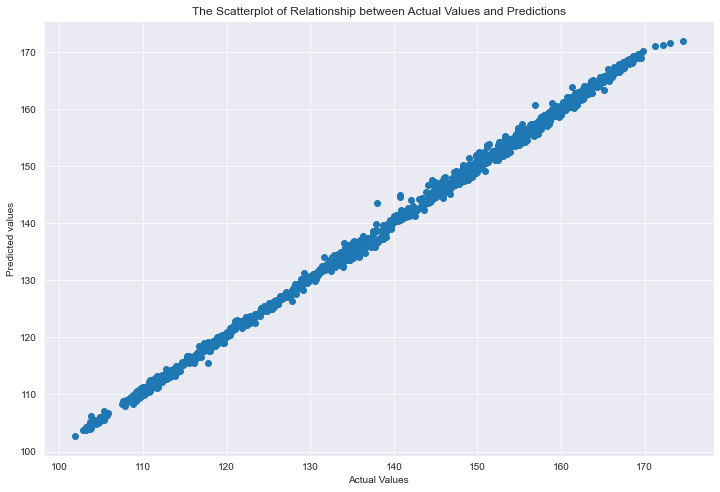

In [71]:
plt.figure(figsize = (12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [72]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_predict_test))
print ("MSE:", metrics.mean_squared_error(y_test, y_predict_test))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_predict_test)))

MAE: 0.4999694821175111
MSE: 0.4271993457733153
RMSE: 0.65360488505925


In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ', r2_score(y_train, y_predict_train))
print('R2_score (test): ', r2_score(y_test, y_predict_test))

376/376 [==============================] - 0s 693us/step
R2_score (train):  0.9987055057154391
R2_score (test):  0.9982938615839582


In [74]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows our model predict % 99.87 of the target correctly


### Residual Analysis

<AxesSubplot:ylabel='Density'>

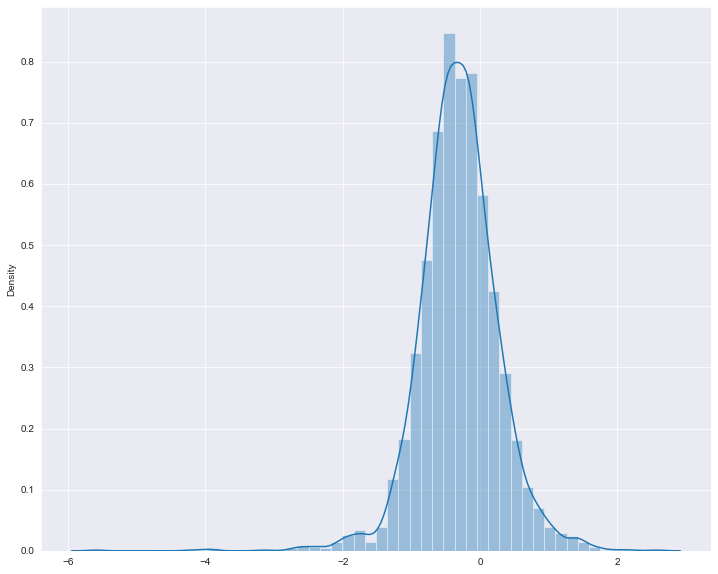

In [75]:
plt.figure(figsize=(12,10))
sns.distplot(y_test - y_predict_test, bins = 50) 

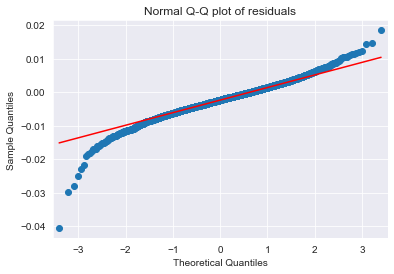

In [76]:
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()